In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
print(X[:5])
print(iris.feature_names)
print(iris.target_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)

print(predictions[:10])
print('Random Forest (랜덤포레스트) 분류 모형 성능(정확도): ', end=''); print(accuracy_score(testy, predictions))

print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions)
print(conf)

print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))

print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

[1 0 2 1 1 0 1 2 1 1]
Random Forest (랜덤포레스트) 분류 모형 성능(정확도): 1.0
$$$ Confusion Matrix, 혼동행렬 $$$
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

!!! 특성 중요도 !!!
[0.10809762 0.03038681 0.43999397 0.42152159]


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
X = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridresult = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
gridresult.fit(trainx, trainy)
bestparam = gridresult.best_params_
print('Grid 탐색을 통한 최적 파라미터 값: ', end=''); print(bestparam)
bestaccuracy = gridresult.best_score_
print('최적 파라미터 값 적용시 RandomForest 모형의 정확도(훈련데이터세트): ', end=''); print(bestaccuracy)
bestmodel = gridresult.best_estimator_
testaccuracy = bestmodel.score(testx, testy)
print('검증데이터세트 이용한 정확도(최적 파라미터 적용): ', end=''); print(testaccuracy)
predictions = bestmodel.predict(testx)
print(predictions[:10])
print('Random Forest모형 정확도_검증데이터세트best parameters/accuracy_score(): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions)
print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))

Grid 탐색을 통한 최적 파라미터 값: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
최적 파라미터 값 적용시 RandomForest 모형의 정확도(훈련데이터세트): 0.9583333333333334
검증데이터세트 이용한 정확도(최적 파라미터 적용): 1.0
[1 0 2 1 1 0 1 2 1 1]
Random Forest모형 정확도_검증데이터세트best parameters/accuracy_score(): 1.0
$$$ Confusion Matrix, 혼동행렬 $$$
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

iris = load_iris()
X = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

model = ExtraTreesClassifier(random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)

print(predictions[:10])
print('ExtraTreesClassifier 정확도(Bootstrap 샘플 미사용): ', end=''); print(accuracy_score(testy, predictions))

print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions)
print(conf)

print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))

print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

[1 0 2 1 1 0 1 2 1 1]
ExtraTreesClassifier 정확도(Bootstrap 샘플 미사용): 1.0
$$$ Confusion Matrix, 혼동행렬 $$$
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

!!! 특성 중요도 !!!
[0.08897018 0.06481646 0.44348388 0.40272948]


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()
X = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)

model.fit(trainx, trainy)
predictions = model.predict(testx)

print(predictions[:10])
print('ExtraTreesClassifier 정확도(Bootstrap 샘플 미사용): ', end=''); print(accuracy_score(testy, predictions))

print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions)
print(conf)

print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))

print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

[1 0 2 1 1 0 1 2 1 1]
ExtraTreesClassifier 정확도(Bootstrap 샘플 미사용): 1.0
$$$ Confusion Matrix, 혼동행렬 $$$
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

!!! 특성 중요도 !!!
[0.00301495 0.01221694 0.69489558 0.28987253]


In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

iris = load_iris()
X = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(tree_method='hist', random_state=42)

model.fit(trainx, trainy)
predictions = model.predict(testx)

print(predictions[:10])
print('ExtraTreesClassifier 정확도(Bootstrap 샘플 미사용): ', end=''); print(accuracy_score(testy, predictions))

print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions)
print(conf)

print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))

print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

[1 0 2 1 1 0 1 2 1 1]
ExtraTreesClassifier 정확도(Bootstrap 샘플 미사용): 1.0
$$$ Confusion Matrix, 혼동행렬 $$$
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

!!! 특성 중요도 !!!
[0.0110771  0.02904883 0.75245064 0.20742337]


In [8]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

iris = load_iris()
x = iris.data
y = iris.target

model = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(model, x, y, return_train_score=True)

print('훈련데이터세트에 대한 성능(정확도): ', end=''); print(np.mean(scores['train_score']))
print('검증데이터세트에 대한 성능(정확도): ', end=''); print(np.mean(scores['test_score']))

model.fit(x, y)
predictions = model.predict(x)

print(predictions[:10])
print('XGBoost 정확도: ', end=''); print(accuracy_score(y, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(y, predictions)
print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(y, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

훈련데이터세트에 대한 성능(정확도): 1.0
검증데이터세트에 대한 성능(정확도): 0.9533333333333334
[0 0 0 0 0 0 0 0 0 0]
XGBoost 정확도: 1.0
$$$ Confusion Matrix, 혼동행렬 $$$
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

!!! 특성 중요도 !!!
[0.00959796 0.01645038 0.6765859  0.2973658 ]


In [9]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier

iris = load_iris()
x = iris.data
y = iris.target

model = LGBMClassifier(random_state=42)
scores = cross_validate(model, x, y, return_train_score=True)

print('훈련데이터세트에 대한 성능(정확도): ', end=''); print(np.mean(scores['train_score']))
print('검증데이터세트에 대한 성능(정확도): ', end=''); print(np.mean(scores['test_score']))

model.fit(x, y)
predictions = model.predict(x)

print(predictions[:10])
print('LightGBM 정확도: ', end=''); print(accuracy_score(y, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(y, predictions)
print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(y, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data
y = iris.target

model = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_validate(model, x, y, return_train_score=True)

print('훈련데이터세트에 대한 성능(정확도): ', end=''); print(np.mean(scores['train_score']))
print('검증데이터세트에 대한 성능(정확도): ', end=''); print(np.mean(scores['test_score']))

model.fit(x, y)
predictions = model.predict(x)

print(predictions[:10])
print('Decision Tree 분류기(결정트리 알고리즘) 정확도: ', end=''); print(accuracy_score(y, predictions))
print(classification_report(y, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(y, predictions)
print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(y, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

훈련데이터세트에 대한 성능(정확도): 0.9733333333333333
검증데이터세트에 대한 성능(정확도): 0.9733333333333334
[0 0 0 0 0 0 0 0 0 0]
Decision Tree 분류기(결정트리 알고리즘) 정확도: 0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

$$$ Confusion Matrix, 혼동행렬 $$$
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97  

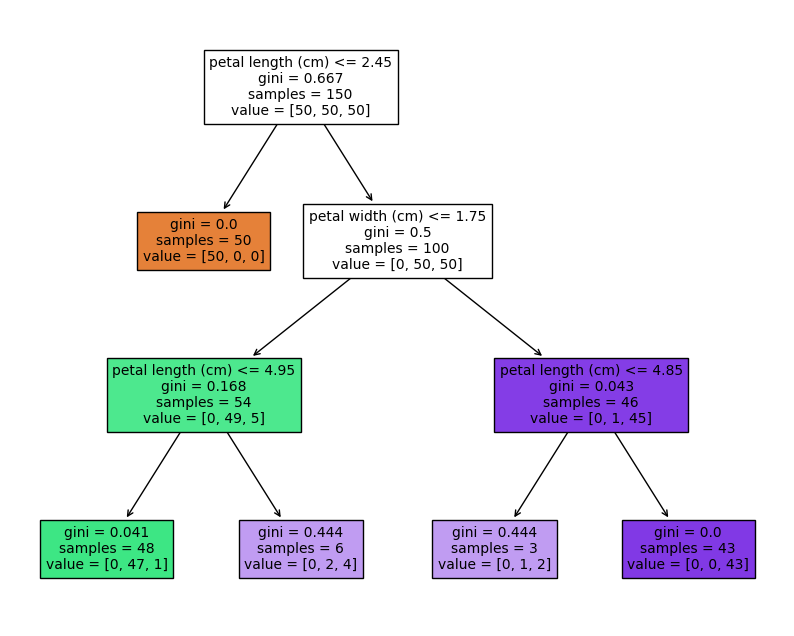

In [11]:
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv('/content/drive/MyDrive/work/carprice.csv', header=0, index_col=0)
data.head()
df = data.dropna()
print(df.dtypes)
print(df['transmission'].unique())
df['transmission'] = df['transmission'].map({'Manual':0, 'Semi-Auto':1, 'Automatic':2})
x = df[['transmission', 'mileage', 'mpg']]
y = df['price']
model = DecisionTreeRegressor(random_state=42)
fit = model.fit(x, y)
pred = fit.predict(x)
print('종속변수 예측 결과값(차량 가격)/첫 10행')
print(pred[:10])

mse = mean_squared_error(y, pred)
print('MSE(Mean Squared Error)/평균제곱오차: ', end=''); print(mse)
print('RMSE(Root Mean Squared Error)/평균제곱근오차: ', end=''); print(np.sqrt(mse))
mae = mean_absolute_error(y, pred)
print('MAE(Mean Absolute Error)/평균절대오차: ', end=''); print(mae)

print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
year              int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
price             int64
dtype: object
['Manual' 'Automatic' 'Semi-Auto']
종속변수 예측 결과값(차량 가격)/첫 10행
[12500. 16500. 11000. 16800. 19391. 13900. 13250. 11750. 10200. 12000.]
MSE(Mean Squared Error)/평균제곱오차: 2027625.3066388879
RMSE(Root Mean Squared Error)/평균제곱근오차: 1423.9470870221576
MAE(Mean Absolute Error)/평균절대오차: 257.95122868112185
!!! 특성 중요도 !!!
[0.06193195 0.3614493  0.57661874]


In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
print(X[:5])
print(iris.feature_names)
print(iris.target_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


** 군집 결과값 **
[6 6 6 6 6 5 6 6 6 6 6 6 6 6 5 5 5 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 6 6 6
 6 6 6 6 3 6 6 6 6 6 6 6 6 1 1 1 4 1 4 1 3 1 4 3 1 4 1 1 1 1 4 4 4 1 1 1 1
 1 1 1 1 1 4 4 4 4 1 1 1 1 4 1 4 4 1 4 3 4 1 1 1 3 4 1 1 1 1 1 2 4 2 1 2 1
 1 1 1 1 1 1 2 2 4 1 1 2 1 1 2 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


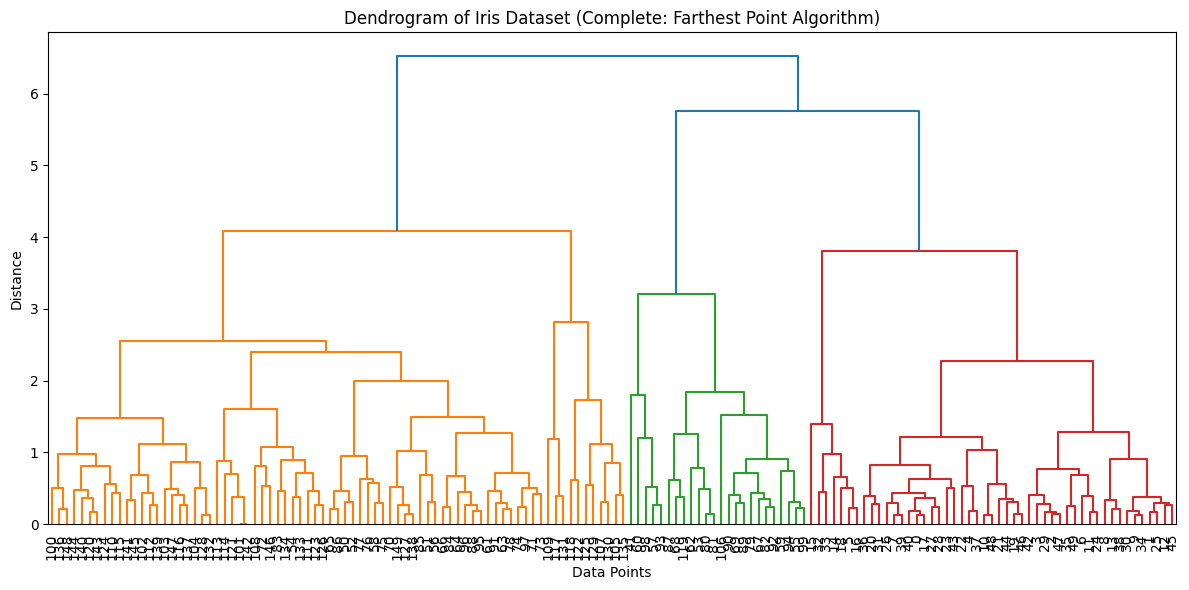

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clusters = linkage(X_scaled, method='complete')

cut = fcluster(clusters, t=3, criterion='distance')
print('** 군집 결과값 **')
print(cut)

plt.figure(figsize=(12, 6))
dendrogram(clusters, orientation='top', leaf_font_size=10)
plt.title('Dendrogram of Iris Dataset (Complete: Farthest Point Algorithm)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

** 군집 결과값 **
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


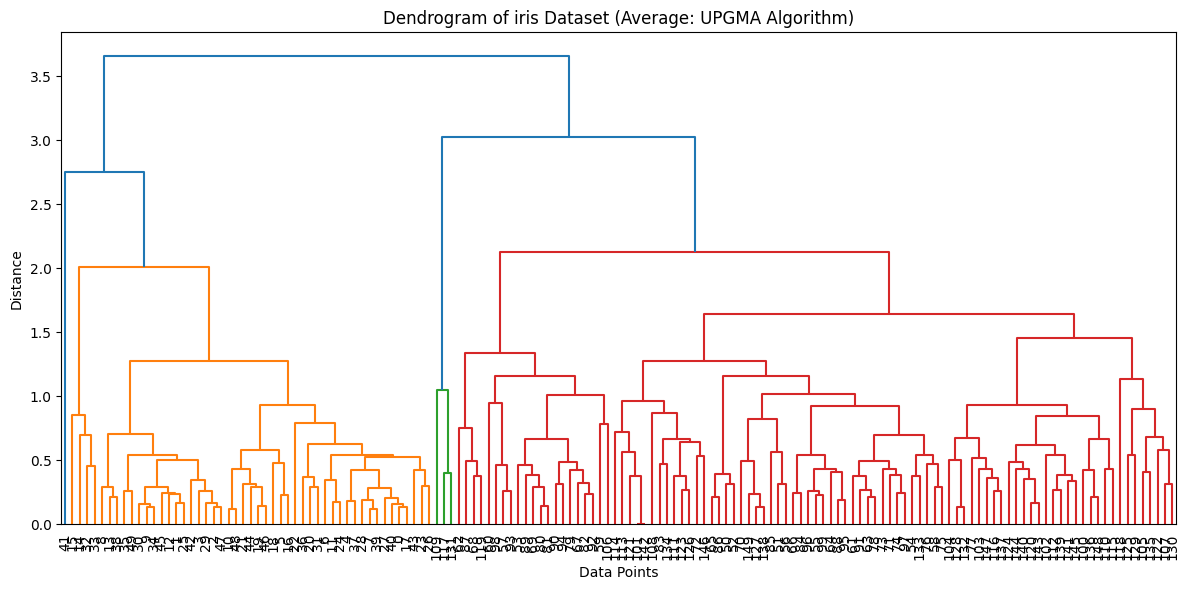

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clusters = linkage(X_scaled, method='average')

cut = fcluster(clusters, t=3, criterion='distance')
print('** 군집 결과값 **')
print(cut)

plt.figure(figsize=(12, 6))
dendrogram(clusters, orientation='top', leaf_font_size=10)
plt.title('Dendrogram of iris Dataset (Average: UPGMA Algorithm)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

** 군집 결과값 **
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


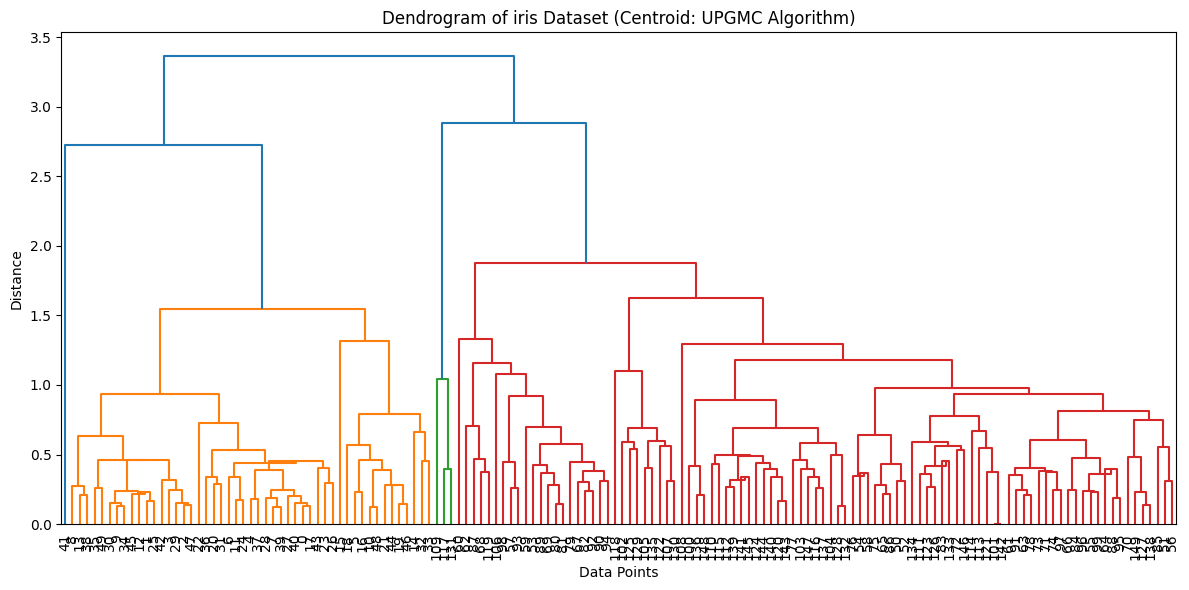

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clusters = linkage(X_scaled, method='centroid')

cut = fcluster(clusters, t=3, criterion='distance')
print('** 군집 결과값 **')
print(cut)

plt.figure(figsize=(12, 6))
dendrogram(clusters, orientation='top', leaf_font_size=10)
plt.title('Dendrogram of iris Dataset (Centroid: UPGMC Algorithm)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

** 군집 결과값 **
[ 3  1  1  1  3  2  1  3  1  1  3  1  1  1  2  2  2  3  2  3  3  3  3  3
  1  1  3  3  3  1  1  3  2  2  1  1  3  3  1  3  3  4  1  3  3  1  3  1
  3  1  8  8  8  6  8  5  8  4  8  6  4  8  6  8  5  8  5  6  6  6  8  8
  7  8  8  8  8  8  8  6  6  6  6  7  5  8  8  6  5  6  6  8  6  4  6  5
  5  8  4  5 11  7 11  8  8  9  6  9  7 10 11  7 11  7  7 11  8 10  9  6
 11  7  9  7 11  9  7  8  8  9  9 10  8  8  7  9 11  8  8 11 11 11  7 11
 11 11  7  8 11  8]


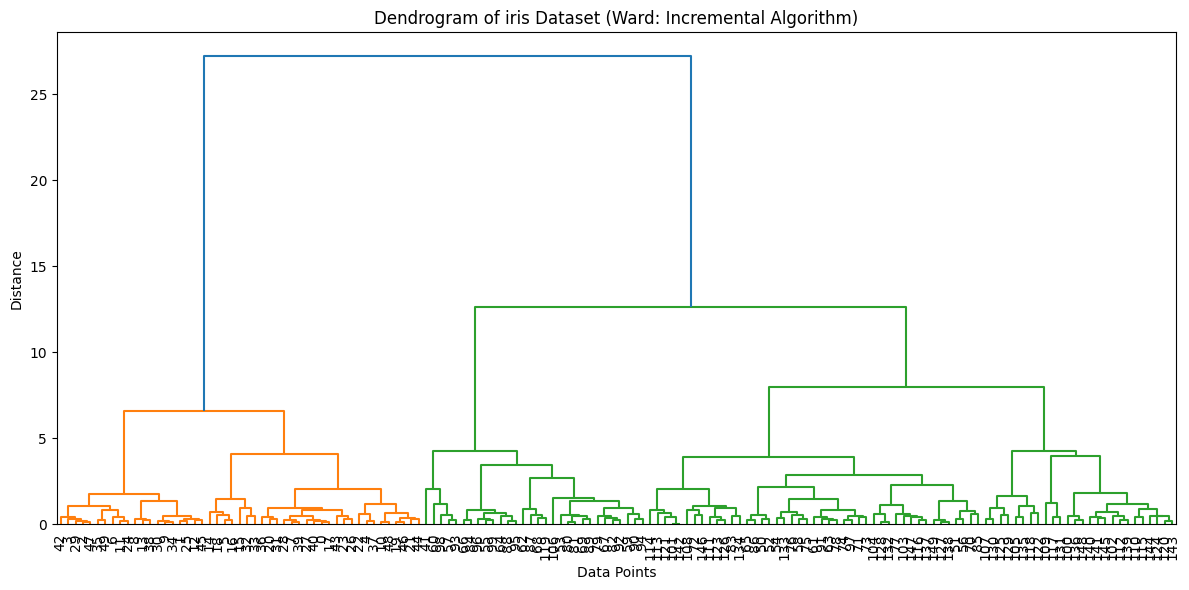

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clusters = linkage(X_scaled, method='ward')

cut = fcluster(clusters, t=3, criterion='distance')
print('** 군집 결과값 **')
print(cut)

plt.figure(figsize=(12, 6))
dendrogram(clusters, orientation='top', leaf_font_size=10)
plt.title('Dendrogram of iris Dataset (Ward: Incremental Algorithm)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

K-means 군집분석 수행 결과
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


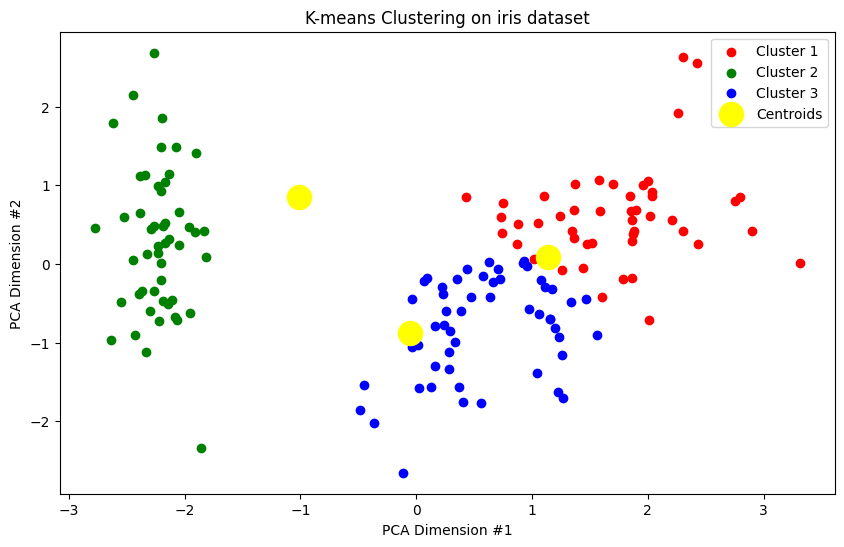

In [20]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
x = iris.data
y = iris.target
scaler = StandardScaler()
xscaled = scaler.fit_transform(x)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(xscaled)
noclusters = 3
kmeans_model = KMeans(n_clusters=noclusters, random_state=42)
kmeans_model.fit(xscaled)
labels = kmeans_model.labels_

print('K-means 군집분석 수행 결과')
print(labels)
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(noclusters):
    plt.scatter(x_pca[labels == i, 0], x_pca[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title(f'K-means Clustering on iris dataset')
plt.xlabel('PCA Dimension #1')
plt.ylabel('PCA Dimension #2')
plt.legend()
plt.show()

In [21]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
x = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
trainx_scaled = scaler.fit_transform(trainx)
testx_scaled = scaler.transform(testx)

n = 3
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(trainx_scaled, trainy)

ypred = knn.predict(testx_scaled)
print(' 분류 분석 결과(knn)')
print(ypred)

accuracy = accuracy_score(testy, ypred)
print('k-nearest neighbors(knn) 분류 분석 결과 정확도(Accuracy): ', end=''); print(accuracy)

print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, ypred)
print(conf)

print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, ypred))

 분류 분석 결과(knn)
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
k-nearest neighbors(knn) 분류 분석 결과 정확도(Accuracy): 1.0
$$$ Confusion Matrix, 혼동행렬 $$$
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

iris = load_iris()
x = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
trainx_scaled = scaler.fit_transform(trainx)
testx_scaled = scaler.transform(testx)

n = 3
knn_regr = KNeighborsRegressor(n_neighbors=n)
knn_regr.fit(trainx_scaled, trainy)

ypred = knn_regr.predict(testx_scaled)
print(' 분류 분석 결과(knn regressor)')
print(ypred)

mse = mean_squared_error(testy, ypred)
print(f'knn-regressor(knn 회귀분석 모형) mean squared error(mse, 평균제곱오차): {round(mse, 5)}')

 분류 분석 결과(knn regressor)
[1.         0.         2.         1.         1.         0.
 1.         2.         1.33333333 1.         2.         0.
 0.         0.         0.         1.         2.         1.
 1.         2.         0.         2.         0.         2.
 2.         2.         1.66666667 2.         0.         0.        ]
knn-regressor(knn 회귀분석 모형) mean squared error(mse, 평균제곱오차): 0.00741


In [26]:
!pip install mlxtend

In [29]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

data = [['Cookie', 'Apple', 'Pork', 'Beer', 'Milk', 'Beans', 'Eggs', 'Yogurt'],
        ['Sausage', 'Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt', 'Banana'],
        ['Apple', 'Beer', 'Milk', 'Eggs', 'Beans'],
        ['Yogurt', 'Milk', 'Beans', 'Corn', 'Sausage', 'Orange', 'Banana'],
        ['Sausage', 'Orange', 'Milk', 'Corn', 'Yogurt'],
        ['Corn', 'Cookie', 'Beans', 'Milk', 'Orange', 'Eggs']]
data_encoded = TransactionEncoder()
data_encoded_array = data_encoded.fit(data).transform(data)
df = pd.DataFrame(data_encoded_array, columns=data_encoded.columns_)
print(df)

   Apple  Banana  Beans   Beer   Coke  Cookie   Corn   Eggs   Milk  Orange  \
0   True   False   True   True  False    True  False   True   True   False   
1   True    True   True  False   True    True  False   True  False   False   
2   True   False   True   True  False   False  False   True   True   False   
3  False    True   True  False  False   False   True  False   True    True   
4  False   False  False  False  False   False   True  False   True    True   
5  False   False   True  False  False    True   True   True   True    True   

    Pork  Sausage  Yogurt  
0   True    False    True  
1  False     True    True  
2  False    False   False  
3  False     True    True  
4  False     True    True  
5  False    False   False  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

data = [['Cookie', 'Apple', 'Pork', 'Beer', 'Milk', 'Beans', 'Eggs', 'Yogurt'],
        ['Sausage', 'Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt', 'Banana'],
        ['Apple', 'Beer', 'Milk', 'Eggs', 'Beans'],
        ['Yogurt', 'Milk', 'Beans', 'Corn', 'Sausage', 'Orange', 'Banana'],
        ['Sausage', 'Orange', 'Milk', 'Corn', 'Yogurt'],
        ['Corn', 'Cookie', 'Beans', 'Milk', 'Orange', 'Eggs']]
data_encoded = TransactionEncoder()
data_encoded_array = data_encoded.fit(data).transform(data)
df = pd.DataFrame(data_encoded_array, columns=data_encoded.columns_)

items = apriori(df, min_support=0.05, use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x:len(x))
print(items)

      support                                           itemsets  length
0    0.500000                                            (Apple)       1
1    0.333333                                           (Banana)       1
2    0.833333                                            (Beans)       1
3    0.333333                                             (Beer)       1
4    0.166667                                             (Coke)       1
..        ...                                                ...     ...
618  0.166667  (Coke, Eggs, Banana, Sausage, Cookie, Yogurt, ...       7
619  0.166667  (Corn, Milk, Banana, Sausage, Yogurt, Beans, O...       7
620  0.166667    (Milk, Eggs, Beer, Pork, Cookie, Yogurt, Beans)       7
621  0.166667  (Coke, Apple, Eggs, Banana, Sausage, Cookie, Y...       8
622  0.166667  (Milk, Apple, Eggs, Beer, Pork, Cookie, Yogurt...       8

[623 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

data = [['Cookie', 'Apple', 'Pork', 'Beer', 'Milk', 'Beans', 'Eggs', 'Yogurt'],
        ['Sausage', 'Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt', 'Banana'],
        ['Apple', 'Beer', 'Milk', 'Eggs', 'Beans'],
        ['Yogurt', 'Milk', 'Beans', 'Corn', 'Sausage', 'Orange', 'Banana'],
        ['Sausage', 'Orange', 'Milk', 'Corn', 'Yogurt'],
        ['Corn', 'Cookie', 'Beans', 'Milk', 'Orange', 'Eggs']]
data_encoded = TransactionEncoder()
data_encoded_array = data_encoded.fit(data).transform(data)
df = pd.DataFrame(data_encoded_array, columns=data_encoded.columns_)

items = apriori(df, min_support=0.05, use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x:len(x))
item1 = items[(items['length'] >= 2) & (items['support'] >= 0.6)]
print(items)

      support                                           itemsets  length
0    0.500000                                            (Apple)       1
1    0.333333                                           (Banana)       1
2    0.833333                                            (Beans)       1
3    0.333333                                             (Beer)       1
4    0.166667                                             (Coke)       1
..        ...                                                ...     ...
618  0.166667  (Coke, Eggs, Banana, Sausage, Cookie, Yogurt, ...       7
619  0.166667  (Corn, Milk, Banana, Sausage, Yogurt, Beans, O...       7
620  0.166667    (Milk, Eggs, Beer, Pork, Cookie, Yogurt, Beans)       7
621  0.166667  (Coke, Apple, Eggs, Banana, Sausage, Cookie, Y...       8
622  0.166667  (Milk, Apple, Eggs, Beer, Pork, Cookie, Yogurt...       8

[623 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
data = [['Cookie', 'Apple', 'Pork', 'Beer', 'Milk', 'Beans', 'Eggs', 'Yogurt'],
        ['Sausage', 'Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt', 'Banana'],
        ['Apple', 'Beer', 'Milk', 'Eggs', 'Beans'],
        ['Yogurt', 'Milk', 'Beans', 'Corn', 'Sausage', 'Orange', 'Banana'],
        ['Sausage', 'Orange', 'Milk', 'Corn', 'Yogurt'],
        ['Corn', 'Cookie', 'Beans', 'Milk', 'Orange', 'Eggs']]
data_encoded = TransactionEncoder()
data_encoded_array = data_encoded.fit(data).transform(data)
df = pd.DataFrame(data_encoded_array, columns=data_encoded.columns_)

items = apriori(df, min_support=0.05, use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x:len(x))
rule1 = association_rules(items, metric='lift', min_threshold=2)
print(rule1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           antecedents                                       consequents  \
0              (Apple)                                            (Beer)   
1               (Beer)                                           (Apple)   
2              (Apple)                                            (Coke)   
3               (Coke)                                           (Apple)   
4              (Apple)                                            (Pork)   
...                ...                                               ...   
10211  (Yogurt, Beans)           (Milk, Apple, Eggs, Beer, Pork, Cookie)   
10212          (Apple)   (Milk, Eggs, Beer, Pork, Cookie, Yogurt, Beans)   
10213           (Beer)  (Milk, Apple, Eggs, Pork, Cookie, Yogurt, Beans)   
10214           (Pork)  (Milk, Apple, Eggs, Beer, Cookie, Yogurt, Beans)   
10215         (Cookie)    (Milk, Apple, Eggs, Beer, Pork, Yogurt, Beans)   

       antecedent support  consequent support   support  confidence  lift  \
0         

In [34]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
data = pd.read_csv('/content/drive/MyDrive/work/grocery.csv', index_col=0)
df = data.dropna()
items = apriori(df, min_support=0.1, use_colnames=True)
print(items.sort_values('support', ascending=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     support                               itemsets
5   0.198545                              (sausage)
10  0.147197                                 (pork)
1   0.145200                          (frankfurter)
9   0.138782                      (root vegetables)
11  0.137356                                 (beef)
0   0.126943                           (whole milk)
8   0.125089                       (hamburger meat)
7   0.123235                               (yogurt)
2   0.114392                              (chicken)
6   0.111396                          (brown bread)
4   0.108401                        (bottled water)
14  0.108258                                  (ham)
19  0.104265      (root vegetables, hamburger meat)
12  0.103552                               (pastry)
16  0.103266                  (brown bread, yogurt)
15  0.102981                 (sausage, 

In [35]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
data = pd.read_csv('/content/drive/MyDrive/work/grocery.csv', index_col=0)
df = data.dropna()
items = apriori(df, min_support=0.1, use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x:len(x))
itemset1 = items[(items['length'] == 2) & (items['support'] >= 0.103)]
print(itemset1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     support                           itemsets  length
16  0.103266              (brown bread, yogurt)       2
19  0.104265  (root vegetables, hamburger meat)       2


In [37]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
data = pd.read_csv('/content/drive/MyDrive/work/grocery.csv', index_col=0)
df = data.dropna()
items = apriori(df, min_support=0.1, use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x:len(x))
rule1 = association_rules(items, metric='lift', min_threshold=0.8)
print(rule1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                      antecedents                    consequents  \
0                       (sausage)                  (brown bread)   
1                   (brown bread)                      (sausage)   
2                   (brown bread)                       (yogurt)   
3                        (yogurt)                  (brown bread)   
4                   (brown bread)               (hamburger meat)   
5                (hamburger meat)                  (brown bread)   
6                        (yogurt)               (hamburger meat)   
7                (hamburger meat)                       (yogurt)   
8               (root vegetables)               (hamburger meat)   
9                (hamburger meat)              (root vegetables)   
10                         (pork)              (root vegetables)   
11              (root vegetables)                      

In [38]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
data = pd.read_csv('/content/drive/MyDrive/work/grocery.csv', index_col=0)
df = data.dropna()
items = apriori(df, min_support=0.1, use_colnames=True)
items['length'] = items['itemsets'].apply(lambda x:len(x))
rule2 = association_rules(items, metric='lift', min_threshold=6.5)
print(rule2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                      antecedents                    consequents  \
0                   (brown bread)                       (yogurt)   
1                        (yogurt)                  (brown bread)   
2                   (brown bread)               (hamburger meat)   
3                (hamburger meat)                  (brown bread)   
4                        (yogurt)               (hamburger meat)   
5                (hamburger meat)                       (yogurt)   
6           (brown bread, yogurt)               (hamburger meat)   
7   (brown bread, hamburger meat)                       (yogurt)   
8        (yogurt, hamburger meat)                  (brown bread)   
9                   (brown bread)       (yogurt, hamburger meat)   
10                       (yogurt)  (brown bread, hamburger meat)   
11               (hamburger meat)          (brown bread

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


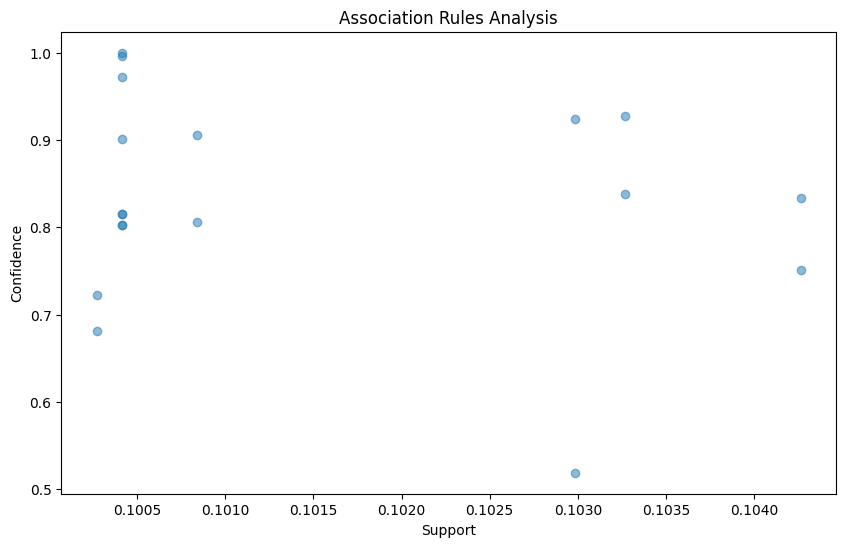

In [40]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/work/grocery.csv', index_col=0)
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support'); plt.ylabel('Confidence')
plt.title('Association Rules Analysis'); plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/work/grocery.csv', index_col=0)

frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence'); plt.ylabel('Lift')
plt.title('Association Rules Analysis'); plt.show()